## Titanic Survivor Prediction

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Train and Test Data Sets**

In [2]:
train = pd.read_csv('titanic_train.csv')

test = pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Features PassengerId and Name are of No use for Prediction**

In [5]:
train.drop(['PassengerId','Name'], axis = 'columns', inplace = True)

test.drop(['PassengerId','Name'], axis = 'columns', inplace = True)

In [6]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S


**Information of Data Set**

In [8]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
None


**Survived is a Target Feature ( 0 - Not Survived, 1 - Survived )**

In [9]:
print(train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


### Exploratory Data Analysis

**Visualizing Data for Better Understanding**

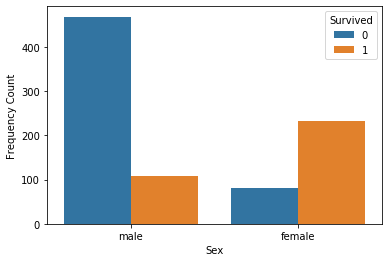

In [10]:
sns.countplot(x = 'Sex', hue = 'Survived', data = train)
plt.ylabel('Frequency Count');

**Gender plays an Important Role here, Womens and Kids were provided with the First Priority at the Time of Rescue Operation.**

**Survival Rate on the basis of Passengers Class.**

In [11]:
print(train.groupby(['Pclass', 'Survived']).size())

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64


In [12]:
print(train.groupby(['Pclass', 'Survived']).size().unstack())

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


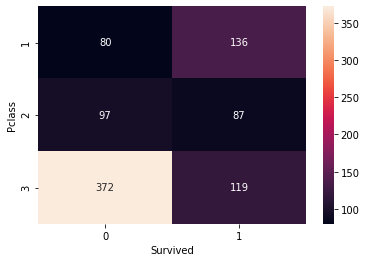

In [13]:
pclass_survived = train.groupby(['Pclass', 'Survived']).size().unstack()

sns.heatmap(pclass_survived, annot = True, fmt = 'd');

**Survival Rate of Passengers of Class 1 is More as Compared to Second and Third Class.**

**First Class Passengers where on the Top Floor of the Ship they got the Life Boats easily.**

***

### Factor Plot

**Adding New Feature for Passengers with Family and Single Passenger.**

**Family Feature consist of Total Number of Members in the Family of Passengers.**

In [14]:
train['Family'] = train['Parch'] + train['SibSp']  # Parents - Children + Siblings - Spouses

train['Single'] = np.where(train['Family'] == 0, 1,0)

In [15]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Single
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,1


**Categorical Plot for Passengers with Family**

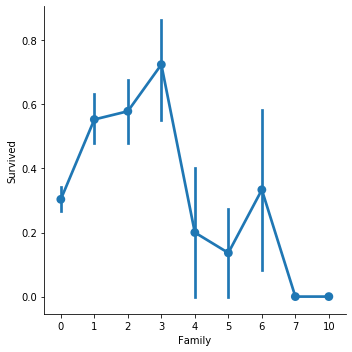

In [16]:
sns.catplot(x = 'Family', y = 'Survived', data = train, kind = 'point');

**Categorical Plot for Single Passenger**

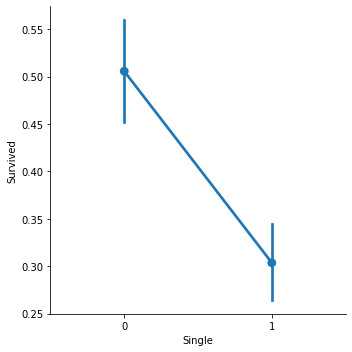

In [17]:
sns.catplot(x = 'Single', y = 'Survived', data = train, kind = 'point');

**Survival Rate of Single Passengers was less.**

***

**Survival Rate based on Fare Category**

In [18]:
train['Fare Range'] = pd.qcut(train['Fare'], 4) # Quantile Cut in 4 Bins

**Barplot Representing the Survival Rate on the Basis of Fare Range.**

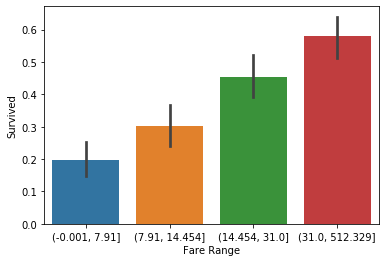

In [19]:
sns.barplot(x = 'Fare Range', y = 'Survived', data = train);

**Passengers who Paid High Fares where on the Top of the Ship, so there Survival Rate is More than others.**

***

**Age Distribution of Passengers across Ship**

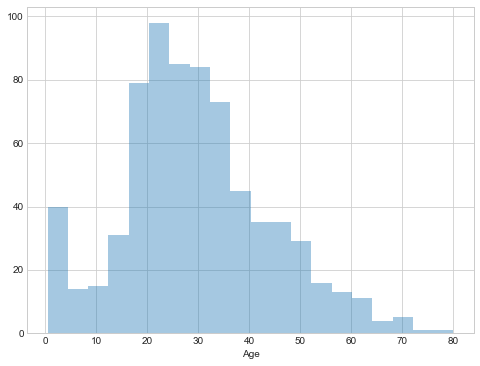

In [20]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,6))
sns.distplot(train['Age'].dropna(), kde = False);

**Passenger were more between 15 and 40, Babies were also More.**

***

**Survival Rate based on Embarkation Ports and Passengers Class.**

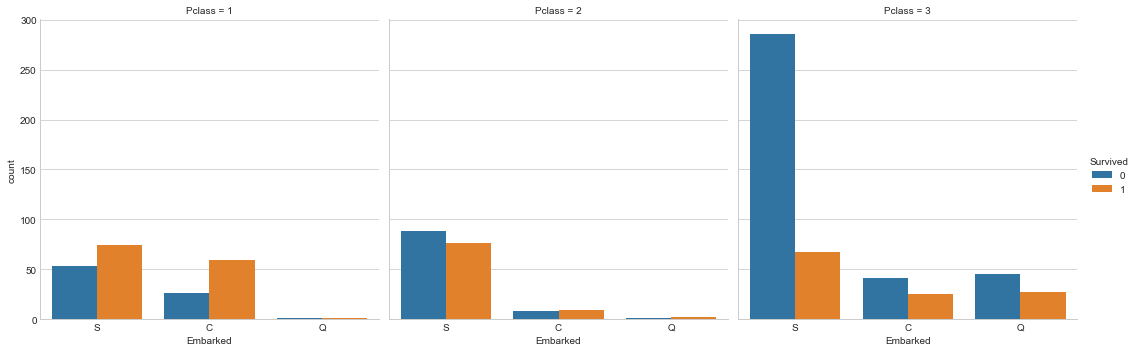

In [21]:
sns.catplot(x = 'Embarked', hue = 'Survived', kind = 'count', col = 'Pclass', data = train);

**Majority of Passengers boarded Ship from Southampton Port.**

**Majority of Passengers boarded Ship at Southampton Port were of Class 3.**

***

### Data Preprocessing

**Dropping the Columns Created for Exploratory Data Analysis.**

In [22]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Single,Fare Range
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,"(-0.001, 7.91]"
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,"(31.0, 512.329]"
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,"(7.91, 14.454]"
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,0,"(31.0, 512.329]"
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,1,"(7.91, 14.454]"


In [23]:
train.drop(['Family', 'Single', 'Fare Range'], axis = 'columns', inplace = True)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


**Target Feature : Survived**

In [24]:
Y_train = train['Survived']

**Independent Features (Train) : Dropping Target Feature.**

In [25]:
train.drop('Survived', axis = 'columns', inplace = True)

**Adding a Columns for Later Splitting the Train and Test Data Sets**

In [26]:
train['Data'] = 'train'

test['Data'] = 'test'

**Checking Columns of Train and Test Data Set**

In [27]:
print(f'Train Data Set : {train.columns}')

print()

print(f'Test Data Set : {test.columns}')

Train Data Set : Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Data'],
      dtype='object')

Test Data Set : Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Data'],
      dtype='object')


**Concatenating Train and Test Data Sets for Data Preprocessing**

In [28]:
titanic = pd.concat([train, test], axis = 'rows')

print(f'Train Data Set : {train.shape} \nTest Data Set : {test.shape} \nConcatenated Data Set : {titanic.shape}')

Train Data Set : (891, 10) 
Test Data Set : (418, 10) 
Concatenated Data Set : (1309, 10)


**Dropping the Unnecessary Features.**

In [29]:
titanic.drop(['Ticket','Fare', 'Cabin'], axis = 'columns', inplace = True)

print(titanic.head())

   Pclass     Sex   Age  SibSp  Parch Embarked   Data
0       3    male  22.0      1      0        S  train
1       1  female  38.0      1      0        C  train
2       3  female  26.0      0      0        S  train
3       1  female  35.0      1      0        S  train
4       3    male  35.0      0      0        S  train


In [30]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Embarked  1307 non-null   object 
 6   Data      1309 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 81.8+ KB
None


**Converting Sex Feature from Categorical to Numerical.**

In [31]:
titanic['Sex'] = np.where(titanic['Sex'] == 'male', 1, 0)

print(titanic.head())

   Pclass  Sex   Age  SibSp  Parch Embarked   Data
0       3    1  22.0      1      0        S  train
1       1    0  38.0      1      0        C  train
2       3    0  26.0      0      0        S  train
3       1    0  35.0      1      0        S  train
4       3    1  35.0      0      0        S  train


**Checking Missing Values**

In [32]:
print(titanic.isnull().sum())

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Embarked      2
Data          0
dtype: int64


**Filling / Imputing Missing Values using Scikit Learn Simple Imputer**

**Import Library**

In [33]:
from sklearn.impute import SimpleImputer

**Imputing Missing Data in Age with the Mean of Age Data**

In [34]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputer.fit(titanic[['Age']])

titanic[['Age']] = imputer.transform(titanic[['Age']])

**Imputing Missing Categorical Data with the Most Frequent Data in Embarked**

In [35]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

imputer.fit(titanic[['Embarked']])

titanic[['Embarked']] = imputer.transform(titanic[['Embarked']])

**Converting Age to Integer**

In [36]:
titanic['Age'] = titanic['Age'].astype(int)

**Confirming for Any Missing Data remaining.**

In [37]:
print(titanic.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Data        0
dtype: int64


**No Missing Data is Remaining.**

***

**Confirming for Numeric Data**

In [38]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    1309 non-null   int64 
 1   Sex       1309 non-null   int32 
 2   Age       1309 non-null   int32 
 3   SibSp     1309 non-null   int64 
 4   Parch     1309 non-null   int64 
 5   Embarked  1309 non-null   object
 6   Data      1309 non-null   object
dtypes: int32(2), int64(3), object(2)
memory usage: 71.6+ KB
None


**Embarked Feature is Categorical.**

**Label Encoding the Embarked Feature to convert Categorical Data into Numeric Data.**

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label_encoder = LabelEncoder()

In [41]:
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])

titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Data
0,3,1,22,1,0,2,train
1,1,0,38,1,0,0,train
2,3,0,26,0,0,2,train
3,1,0,35,1,0,2,train
4,3,1,35,0,0,2,train


In [42]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    1309 non-null   int64 
 1   Sex       1309 non-null   int32 
 2   Age       1309 non-null   int32 
 3   SibSp     1309 non-null   int64 
 4   Parch     1309 non-null   int64 
 5   Embarked  1309 non-null   int32 
 6   Data      1309 non-null   object
dtypes: int32(3), int64(3), object(1)
memory usage: 66.5+ KB
None


In [43]:
print(titanic.head())
print()
print(titanic.tail())

   Pclass  Sex  Age  SibSp  Parch  Embarked   Data
0       3    1   22      1      0         2  train
1       1    0   38      1      0         0  train
2       3    0   26      0      0         2  train
3       1    0   35      1      0         2  train
4       3    1   35      0      0         2  train

     Pclass  Sex  Age  SibSp  Parch  Embarked  Data
413       3    1   29      0      0         2  test
414       1    0   39      0      0         0  test
415       3    1   38      0      0         2  test
416       3    1   29      0      0         2  test
417       3    1   29      1      1         0  test


**There is no Categorical Feature left and No more Missing Data Left, Now the Data is Comfortable for Machine Learning.**

**Splitting the Data into Independent Features and Target Feature (Labels)**

In [44]:
train = titanic[titanic['Data'] == 'train']

test = titanic[titanic['Data'] == 'test']

**Dropping the Data Features from Train and Test Data Sets.**

In [45]:
train = train.drop('Data', axis = 'columns')
test = test.drop('Data', axis = 'columns')

**Checking Dimensions of Train and Test Data Sets.**

In [46]:
print(f'Training Data Set : {train.shape} \nTesting Data Set : {test.shape}')

Training Data Set : (891, 6) 
Testing Data Set : (418, 6)


**Applying Feature Scaling on Data Set**

**Import Library**

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
X_train = scaler.fit_transform(train)
X_test = scaler.fit_transform(test)

**Data Set after Scaling**

In [50]:
print(X_train)

[[ 0.82737724  0.73769513 -0.58004441  0.43279337 -0.47367361  0.58595414]
 [-1.56610693 -1.35557354  0.65011226  0.43279337 -0.47367361 -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.27250525 -0.4745452  -0.47367361  0.58595414]
 ...
 [ 0.82737724 -1.35557354 -0.04185087  0.43279337  2.00893337  0.58595414]
 [-1.56610693  0.73769513 -0.27250525 -0.4745452  -0.47367361 -1.9423032 ]
 [ 0.82737724  0.73769513  0.18880351 -0.4745452  -0.47367361 -0.67817453]]


***

## Classification Models

**Creating Classification Models.**

**Model with Best Accuracy will be the Final Machine Learning Model for our Data Set.**

### 1. Logistic Regression

***

**Import Linear Model**

In [51]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state = 1)

**Fitting the Data to the Logistic Regression Classifier for Training and Finding Patterns.**

In [52]:
print(lr_classifier.fit(X_train, Y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


**Prediction made by Logistic Regression Classifier on Test Data.**

In [53]:
Y_prediction = lr_classifier.predict(X_test)

**Evaluation of the Logistic Regression Classifier.**

In [54]:
from sklearn.model_selection import cross_val_score

**Evaluating Estimator Performance**

**Avoids Overfitting**

<table><tr><td><img src = "Grid Search Cross Validation.png"></td></tr></table>

In [55]:
lr_score = cross_val_score(lr_classifier, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()

print(f'Cross Validation Score of Logistic Regression Classifier : {lr_score*100:.2f}%')

Cross Validation Score of Logistic Regression Classifier : 79.57%


### 2. K Nearest Neighbors 

**Import K Nearest Neighbors Classifier**

In [56]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

**Fitting the Data to the K Nearest Neighbors Classifier for Training and Finding Patterns.**

In [57]:
print(KNN_classifier.fit(X_train, Y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


**Prediction made by K Nearest Neighbors Classifier on Test Data.**

In [58]:
Y_prediction = KNN_classifier.predict(X_test)

**Evaluation of the K Nearest Neighbors Classifier.**

In [59]:
KNN_score = cross_val_score(KNN_classifier, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()

print(f'Cross Validation Score of K Nearest Neighbors Classifier : {KNN_score*100:.2f}%')

Cross Validation Score of K Nearest Neighbors Classifier : 79.46%


### 3. Decision Tree Classifier

**Import Tree Classifier**

In [60]:
from sklearn.tree import DecisionTreeClassifier

DT_classifier = DecisionTreeClassifier()

**Fitting the Data to the Decision Tree Classifier for Training and Finding Patterns.**

In [61]:
print(DT_classifier.fit(X_train, Y_train))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


**Predictions made by Decision Tree Classifier on Test Data.**

In [62]:
Y_prediction = DT_classifier.predict(X_test)

**Evaluation of the Decision Tree Classifier.**

In [63]:
DT_score = cross_val_score(DT_classifier, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()

print(f'Cross Validation Score of Decision Tree Classifier : {DT_score*100:.2f}%')

Cross Validation Score of Decision Tree Classifier : 78.68%


### 4. Random Forest Classifier

**Import Ensemble Classifier Technique.**

In [64]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)

**Fitting the Data to the Model for Training and Finding Patterns.**

In [65]:
print(RF_classifier.fit(X_train, Y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


**Prediction made by Random Forest Classifier on Test Data.**

In [66]:
Y_prediction = RF_classifier.predict(X_test)

**Evaluation of Random Forest Classifier.**

In [67]:
RF_score = cross_val_score(RF_classifier, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()

print(f'Cross Validation Score of Random Forest Classifier : {RF_score*100:.2f}%')

Cross Validation Score of Random Forest Classifier : 81.49%


### 5. Support Vector Classifier :

**Import SVM Classifier**

In [68]:
from sklearn.svm import SVC

SV_classifier = SVC()

**Fitting the Data to the Support Vector Classifier for Training and Finding Patterns.**

In [69]:
print(SV_classifier.fit(X_train, Y_train))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


**Prediction made by Support Vector Classifier on Test Data**

In [70]:
Y_prediction = SV_classifier.predict(X_test)

**Evaluation of Support Vector Classifier.**

In [71]:
SVC_score = cross_val_score(SV_classifier, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()

print(f'Cross Validation Score of Suppport Vector Classifier : {SVC_score*100:.2f}%')

Cross Validation Score of Suppport Vector Classifier : 82.38%


**Creating a Data Frame Representing Accuracy Score of All Classifiers.**

In [72]:
Accuracy = pd.DataFrame({'Classifier' : ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector'],
                         'Score' : [lr_score, KNN_score, DT_score, RF_score, SVC_score]},
                        columns = ['Classifier', 'Score'])

print(Accuracy)

            Classifier     Score
0  Logistic Regression  0.795743
1  K Nearest Neighbors  0.794644
2        Decision Tree  0.786841
3        Random Forest  0.814869
4       Support Vector  0.823820


**Importing test Data Set for Selecting PassengerId Column**

In [73]:
test = pd.read_csv('titanic_test.csv')

**Creating Data Frame for Submission of Predictions.**

In [74]:
submission = pd.DataFrame({'PassengerId' : test['PassengerId'],
                           'Survived' : Y_prediction})

In [75]:
print(submission['Survived'].value_counts())

0    286
1    132
Name: Survived, dtype: int64


**Submission to CSV**

In [76]:
submission.to_csv('Titanic_Prediction.csv', index = False)